# 初始化

In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '1'

from dotenv import load_dotenv
load_dotenv(dotenv_path='', override=True)

from langchain_deepseek import ChatDeepSeek
llm = ChatDeepSeek(model='deepseek-chat', api_key=os.getenv('DEEPSEEK_API_KEY'))

# 自定义构建一个基本智能体

###  创建一个 StateGraph，基本的状态携带信息

In [2]:
from typing import Annotated

from typing_extensions import TypedDict

from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages


class State(TypedDict):

    messages: Annotated[list, add_messages]


graph_builder = StateGraph(State)

### 增加节点

In [3]:
def node(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

graph_builder.add_node("node", node)

### 增加边

In [4]:
graph_builder.add_edge(START, "node")
graph_builder.add_edge("node", END)

### 编译图

In [5]:
graph = graph_builder.compile()

### 可视化

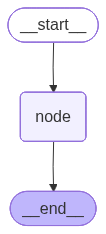

✅ 图结构可视化成功


In [6]:

from IPython.display import Image, display

try:
    # 尝试生成 Mermaid PNG 图
    display(Image(graph.get_graph().draw_mermaid_png()))
    print("✅ 图结构可视化成功")
except Exception as e:
    print(f"⚠️ 可视化失败（不影响功能）: {e}")
    print("图结构: START → chatbot → END")

### 运行

In [ ]:
def stream_graph_updates(user_input: str):
    for event in graph.stream({"messages": [{"role": "user", "content": user_input}]}):
        for value in event.values():
            print("Assistant:", value["messages"][-1].content)


while True:
    try:
        user_input = "What do you know about LangGraph?"
        if user_input.lower() in ["quit", "exit", "q"]:
            print("Goodbye!")
            break
        stream_graph_updates(user_input)
    except:
        # fallback if input() is not available
        user_input = "What do you know about LangGraph?"
        print("User: " + user_input)
        stream_graph_updates(user_input)
        break